In [2]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR/")


/home/yz685/group-testing/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [3]:
output.param_scenarios

['Nominal Parameters', 'Optimistic Parameters', 'Pessimistic Parameters']

In [7]:
output.sim_results['Nominal Parameters'][(0.1,)][0]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,34279,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
1,34268,5,6,0,0,4,1,1,0,0,...,0,0,0,6,8,2,6.0,7.803233,0.144126,0.052640
2,34236,24,12,0,6,5,4,1,0,0,...,0,0,0,9,14,7,9.0,13.655658,0.252221,0.092121
3,34217,36,17,0,5,6,1,1,2,0,...,0,0,0,16,15,11,16.0,14.631062,0.270237,0.098701
4,34194,47,23,3,15,2,1,0,1,0,...,1,0,0,19,20,17,19.0,19.508083,0.360316,0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,33087,58,211,901,10,2,4,1,1,0,...,0,0,2,554,578,557,554.0,563.783592,10.413140,3.803268
109,33075,60,213,911,4,7,1,0,0,0,...,0,2,0,559,583,563,559.0,568.660613,10.503219,3.836168
110,33059,72,217,924,4,3,0,1,0,0,...,1,0,1,565,593,565,565.0,578.414654,10.683377,3.901969
111,33033,92,224,933,0,1,2,0,1,0,...,0,2,0,570,601,569,570.0,586.217887,10.827503,3.954609


In [8]:
from params import ParamConfig

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [9]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]

In [13]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

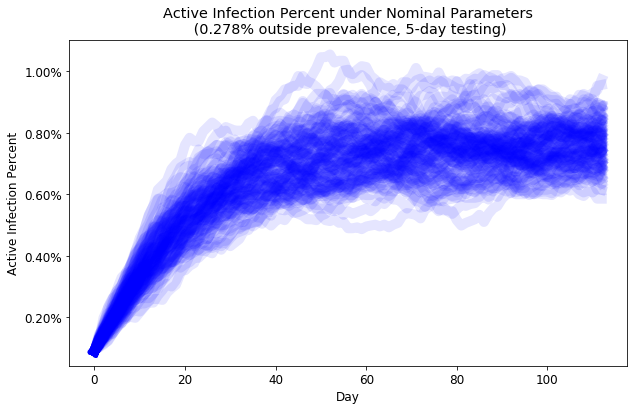

In [23]:
dfs=output.sim_results['Nominal Parameters'][(0.1,)]

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
aip_cols = list(get_active_infection_cols(dfs[0]))
pop_size = get_pop_size(dfs[0])
for df in dfs:
    aip = df[aip_cols].sum(axis=1) / pop_size
    ax.plot(aip, linewidth=10, alpha=0.1, color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Active Infection Percent')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax.set_title('Active Infection Percent under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)')
plt.show()

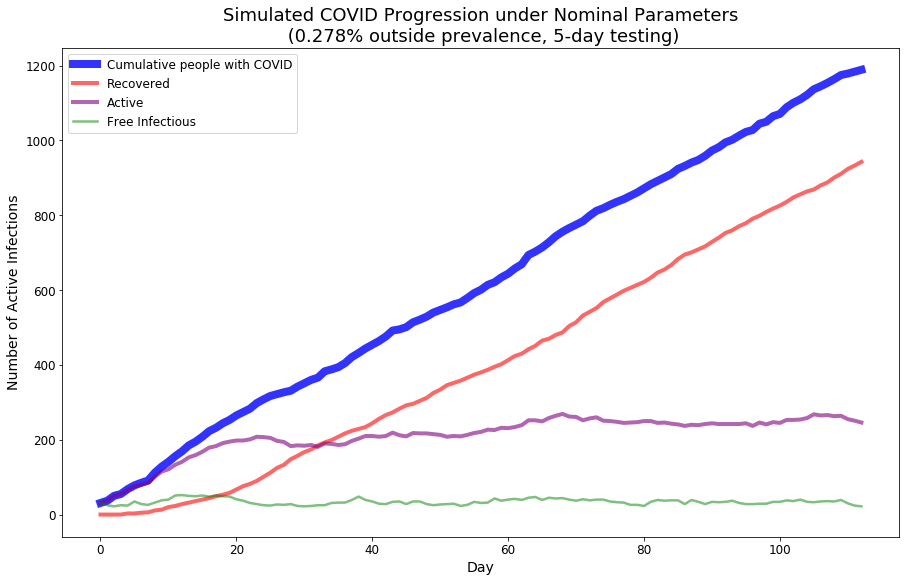

In [24]:
plt.figure(figsize=(15,9))
sample = dfs[0]

plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(sample[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(sample[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#sample_high

Text(0, 0.5, 'Cumulative People in each severity class')

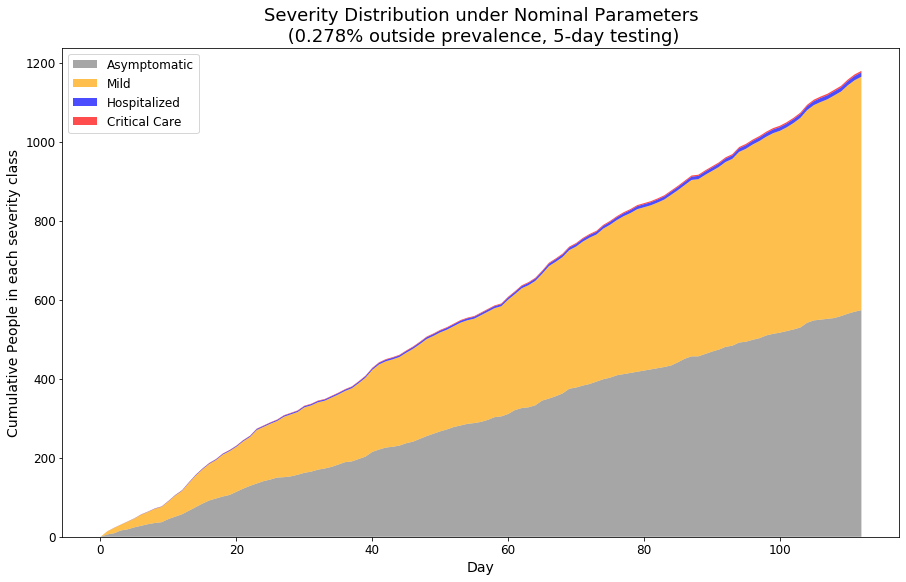

In [25]:
df_0 = sample

# Metric: Area graph of the number of people in each severity state
plt.figure(figsize=(15,9))
y0 = list(df_0['severity_0'])
y1 = list(df_0['severity_1'])
y2 = list(df_0['severity_2'])
y3 = list(df_0['severity_3'])
x = list(range(len(list(df_0['severity_0']))))

plt.stackplot(x, y0,y1,y2,y3, labels=['Asymptomatic','Mild','Hospitalized','Critical Care'], alpha=0.7, colors=['grey', 'orange', 'blue', 'red']*10)
plt.legend(loc='upper left')
plt.title('Severity Distribution under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Cumulative People in each severity class', size=14)

# print(list(df_0['severity_0']), list(df_0['severity_1']), list(df_0['severity_2']), list(df_0['severity_3']))
# print(list(range(len(list(df_0['severity_0'])))))